In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import re

In [126]:
# Loading dataframe
data = pd.read_csv('Downloads/twcs.csv')
data.head(10)
print(data.shape)
print(data.dtypes)
#taking only tweets done by customers
df = data[data["inbound"]== True]
print(df.shape)
df["text"] = df["text"].astype(str)
df.head(23)


(2811774, 7)
tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object
(1537843, 7)


C:\Users\Rana Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
10,16,115713,True,Tue Oct 31 20:00:43 +0000 2017,@sprintcare Since I signed up with you....Sinc...,15,17.0
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
16,22,115716,True,Tue Oct 31 22:16:48 +0000 2017,@Ask_Spectrum Would you like me to email you a...,25,21.0
18,26,115716,True,Tue Oct 31 22:19:56 +0000 2017,@Ask_Spectrum I received this from your corpor...,27,25.0


C:\Users\Rana Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Rana Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rana Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Sentiment
Negative    277976
Positive    580083
Name: author_id, dtype: int64


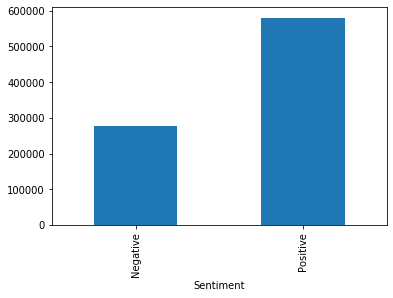

In [127]:
# Removal of URL
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df["text"] = df["text"].apply(lambda text: remove_urls(text))
#removal of tags
def remove_mentions(text):
    mention= re.sub(r'@\w+', '', text)
    return mention
df["text"] = df["text"].apply(lambda text: remove_mentions(text))

# sentiment analysis
from textblob import TextBlob
df["sentiment_score"] = df["text"].apply(lambda text: TextBlob(text).sentiment[0])
df["subjectivity_score"] = df["text"].apply(lambda text: TextBlob(text).sentiment[1])
conditions = [
    (df['sentiment_score'] >=0 ),
      (df['sentiment_score'] < 0)
    ]
values = ['Positive', 'Negative']

df['Sentiment'] = np.select(conditions, values)

df_positive = df[df["Sentiment"]== "Positive"]
df_negative = df[df["Sentiment"]== "Negative"]
graph= df.groupby('Sentiment')['author_id'].nunique()
# number of customers having positive and negative sentiment
print(graph)
graph.plot.bar()


In [ ]:
# set of stopwords
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
# Data preparation by removing stopwords and punctuation and lemmatizing for getting root words only
def clean(text):
    stop_free = " ".join([i for i in text.lower().split() if i not in stop])
    #print("stopfree")
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #print("punc")
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #print("normal")
    return stop_free

text_clean = [clean(text).split() for text in df["text"]]
#df["text"]=pd.DataFrame(text_clean)
negative_clean = [clean(text).split() for text in df_negative["text"]]


positive_clean = [clean(text).split() for text in df_positive["text"]]


# input data for word cloud
import itertools
combined_neg = list(itertools.chain.from_iterable(negative_clean))
words_neg = ""
for i in range(len(combined_neg)):
  words_neg += " ".join(combined_neg)+" "

# Positive cloud
combined_pos = list(itertools.chain.from_iterable(positive_clean))
words_pos = ""
for i in range(len(combined_pos)):
  words_pos += " ".join(combined_pos)+" "


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
neg_wordcloud = WordCloud().generate(words_neg) 
 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(neg_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos_wordcloud = WordCloud().generate(words_pos) 
 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(pos_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)
features

In [ ]:
random_state= 0
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

In [ ]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while training the model (used for models that does not support prediction on new dataset).
cls.labels_
df["topic"] = cls.labels_
df

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')